### IDs:
Insert yours IDs to the cell below

ID #1:329827190

ID #2:204818181


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [2]:
from scipy import stats 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
%matplotlib inline

### Question 1 - Defective products

In a manufacturing pipeline products are 1% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 75% probability of having at least one defective product in the batch sent?
Write a function that computes this.

In [3]:
# Notice that this is a Binomial distribution where p = 0.01. 
# We will find the number of samples required by finding the probability by increasing n
# until we get the desired probability

def find_n_bin(prob_req, p, k):
    n = 0
    while True:
        Y = stats.binom(n,p)
        res = 0
        for i in range (0,k+1):
            res += Y.pmf(i)
        prob = 1 - res
        if prob > prob_req:
            return ("Num Trials Required: {}".format(n))
        n += 1
        

print(find_n_bin(0.75, 0.01, 0))

Num Trials Required: 138


#### Answer the same question but where:
#### 1.B.1 
Products are 4% defective and we want a 95% probability of at least one defective product in the batch

In [4]:
# Using the same function defined above, simply modifing the input arguments to fit the given problem

print(find_n_bin(0.95, 0.04, 0))

Num Trials Required: 74


#### 1.B.2
Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch

In [13]:
# Using the original find_n that was constructed

print(find_n_bin(0.9, 0.1, 4))
# print(find_n_bin(0.9, 0.2, 4))
# print(find_n_bin(0.9, 0.3, 4))
# print(find_n_bin(0.9, 0.4, 4))

Num Trials Required: 78


#### 1.B.3
Products are 20% defective and we want a 90% probability of at least 10 defective products in the batch

In [14]:
# Using the same function as above with different values

# print(find_n_bin(0.9, 0.1, 9))
print(find_n_bin(0.9, 0.2, 9))
# print(find_n_bin(0.9, 0.3, 9))
# print(find_n_bin(0.9, 0.4, 9))

Num Trials Required: 69


#### 1.C
Can you comment on the difference between the answer 1.B.2 and that of 1.B.3?

***Answer:***

The difference between the answers is counter intuitive:
In general, we expect to need more trials to observe more defects. We might even expect the number of trials to be
the some once we notice that we have twice the probability of defect, and half the number of desired defects.
However, neither were the case: 78 trials for at least 5 defects, and 69 trials for twice as many (10) defects.



### Question 2 - Formula

#### 2.A
Prove (you can use what you learned in class. In particular - linearity of variance for independent random variables):

$$g(n,p) = \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} = np\big(1+p(n-1)\big)$$

#### Solution 2A

Note that the given equation $$g(n,p) = \sum_{k=0}^{n} {n \choose k} k^2 p^k (1-p)^{(n-k)} = (E[X^2])$$

Also recall from class that: $$V[X] = E[X^2] - (E[X])^2$$
and that $$V[X] = np(1-p)$$
and that $$E[X] = np$$
and so, $$(E[X])^2 = (np)^2$$

So we have 

1. $E[X^2] =  V[X] + (E[X])^2$  
2.  $= np(1-p) + (np)^2$  
3.  $= np((1-p)+(np)) $  
4.  $= np(1 - p + np) $  
5.  $= np(1 + np - p) $  
6.  $= np(1 + p(n - 1)) $


#### 2.B
Use this formula to compute  (n = 5000, p = 0.1, 0.2, 0.3). What is the complexity of this calculation, in terms of n?

In [23]:
prob_list = [0.1,0.2,0.3]
for p in prob_list:
    res = 5000*p*(1+p*(5000-1))
    print (' p = {} : {} '.format(p,int(res)))

    
print('As n is a constant in this computation, we compute the complexity as O(5000)∈ O(1)')

 p = 0.1 : 250450 
 p = 0.2 : 1000800 
 p = 0.3 : 2251050 
As n is a constant in this computation, we compute the complexity as O(5000)∈ O(1)


#### 2.C
Consider the function:
$$f(n,p) = \sum_{k=0}^{n} {n \choose k} k^3 p^k (1-p)^{(n-k)}$$

Describe how $f(n,p)$ can be computed using a process that requires a constant number of multiplications and additions, regardless of n.
Use your process to compute the values of $f(n=10000, p=0.05, 0.1, 0.2, 0.3)$ in O(1).<br>
Explain all your steps. 
 


***Answer:***

Note that we learned in class that $f(n,p)$ is the raw third moment, i.e., $E(X^{3})$.

We also saw in class that the raw third moment of a random variable $X$ is:

$$\mathbf{E}[(\sum_{k=1}^{n}\ (X_k-p)\ )^3] $$
$$=\mathbf{E}[\sum_{i,j,k=1}^{n}(X_i-p)(X_j-p)(X_k-p)]$$
$$=\sum_{i,j,k=1…n} \mathbf{E}((X_i-p)(X_j-p)(X_k-p))$$

<center> In the summation, the terms equal $0$ except for when $i=j=k$. Thus, </center>

$$ =n\mathbf{E}((X_1-p)^3) $$
$$ =n(p(1-p)^3+(1-p)\ (-p)^3)$$
$$ =np(1-p)(1-2p)$$

<center>Note that this calculation runs in $O(1)$</center>

In [31]:
prob_list = [0.05,0.1,0.2,0.3]
for p in prob_list:
    res = 10000*p*(1-p)*(1-(2*p))
    print (' p = {} : {} '.format(p,int(res)))
    
    
    
    
    ###TODO!!!! 

 p = 0.05 : 427 
 p = 0.1 : 720 
 p = 0.2 : 960 
 p = 0.3 : 840 


### Question 3 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 
The population of SH and RG is 12K and 18K respectively. <br>
Here are some findings of the survey:
* The mean rent in SH and RG is 5100RCU and 3700RCU respectively.
* The median rent is 4000RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 3.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [34]:
print('We want mean: 3700, median:4000')

# Dont change the set of randomized numbers
np.random.seed(101)

mu, sigma = 4000, 100
s = np.random.normal(mu, sigma, 500)
s_t=np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 500, 
              4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 
              4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 
              4000, 4000, 4000, 4000])
s_1 = np.concatenate((s,s_t),axis=0)

print('Mean: {}, Median: {} , IQR: {}'.format(int(np.mean(s_1)), int(np.median(s_1)), int(stats.iqr(s_1))))

We want mean: 3700, median:4000
Mean: 3700, Median: 4000 , IQR: 157


In [35]:
print('We want mean: 5100, median:4000')

np.random.seed(101)

mu, sigma = 4000, 100
s = np.random.normal(mu, sigma, 500)
s_t =np.array([4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000,
               4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 
               4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 
               4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 
               4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 
               4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 4000, 
               4000, 4000, 4000, 9000, 9500, 9500, 8000, 9500, 9500, 9000, 9500, 
               4000, 4000, 9500, 9000, 9500, 6500, 6000, 9500, 9500, 8000, 9500, 
               4000, 4000, 9500, 9000, 9500, 6500, 8000, 9500, 9500, 8000, 9500, 
               4000, 4000, 9500, 9000, 9500, 6500, 8000, 9500, 9500, 8000, 9500, 
               4000, 4000,  9500, 8000, 7500, 8500, 6000, 8500, 4000, 4000, 9500, 
               9000, 8000, 7500, 8500, 18000, 8500, 4000, 4000, 4000, 4000, 4000, 
               9500, 9000, 8500, 15500, 15000, 8500, 9500, 8000, 8000, 8500, 8000, 
               4000, 4000, 15500, 9000, 9323, 18233, 8412, 9123, 8323, 15500, 8500, 
               8000, 16003, 15500, 15500, 15500, 15000, 15500, 15500, 15500, 16000, 
               16000, 16000, 16000, 55000, 15500, 15500, 15500, 15500, 15500, 16000, 
               16000, 55000, 15500, 15500, 15500, 15500, 15500, 16000, 15500, 15500, 
               16000, 55000, 15500, 15000, 15500, 15000, 1, 1, 1, 0, 0, 0, 0, 0, 0, 
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
s_2 = np.concatenate((s,s_t),axis=0)

print('Mean: {}, Median: {} , IQR: {}'.format(int(np.mean(s_2)), int(np.median(s_2)), int(stats.iqr(s_2))))

We want mean: 5100, median:4000
Mean: 5101, Median: 4003 , IQR: 164


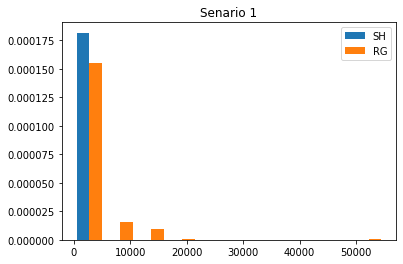

In [48]:
#print(stats.iqr(s_1) < stats.iqr(s_2))
figure, ax = plt.subplots()
ax.hist([s_1,s_2], bins = 10, label=['SH','RG'])
plt.title('Senario 1')
plt.xlabel('')
plt.ylabel('')
plt.legend()

#### 3.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG 

Scenario 3
We want mean: 3700, median:4000
Mean: 3994, Median: 4004 , IQR: 150
We want mean: 5100, median:4000
Mean: 3986, Median: 4004 , IQR: 150
False
True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11be4a6d0>]],
      dtype=object)

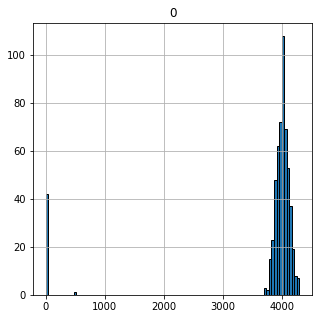

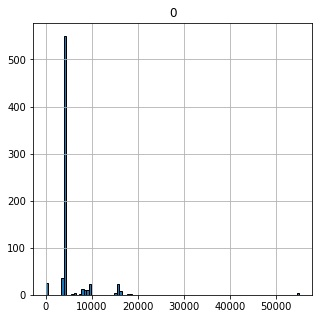

In [715]:
print("Scenario 2")
print('We want mean: 3700, median:4000')

np.random.seed(101)

mu, sigma = 4000, 100
s = np.random.normal(mu, sigma, 500)
s_t=np.array([1, 4000])
s_3 = np.concatenate((s,s_t),axis=0)

print('Mean: {}, Median: {} , IQR: {}'.format(int(np.mean(s_3)), int(np.median(s_3)), int(stats.iqr(s_3))))


print('We want mean: 5100, median:4000')

np.random.seed(101)

mu, sigma = 4000, 100
s = np.random.normal(mu, sigma, 500)
s_t =np.array([4000, 0, 0])
s_4 = np.concatenate((s,s_t),axis=0)

print('Mean: {}, Median: {} , IQR: {}'.format(int(np.mean(s_4)), int(np.median(s_4)), int(stats.iqr(s_4))))

#Must be True
print('RG {}'.format(int(np.var(s_4))))

print(np.var(s_3)>np.var(s_4))
print(stats.iqr(s_3) < stats.iqr(s_4))

pd.DataFrame(s_1).hist(bins=100, 
                          figsize=(5,5),
                          edgecolor="k", linewidth=1)
pd.DataFrame(s_2).hist(bins=100, 
                          figsize=(5,5),
                          edgecolor="k", linewidth=1)

Scenario 3
We want mean: 3700, median:4000
Mean: 3994, Median: 4004 , IQR: 150
We want mean: 5100, median:4000
Mean: 3986, Median: 4004 , IQR: 150
SH 42909
RG 74498
False
True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d159210>]],
      dtype=object)

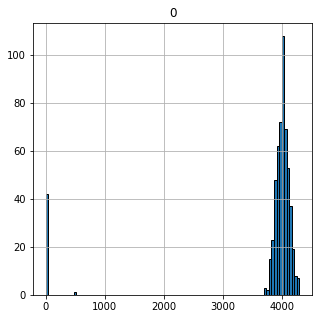

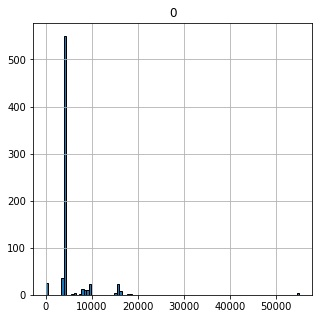

In [718]:
print("Scenario 3")
print('We want mean: 3700, median:4000')

np.random.seed(101)

mu, sigma = 4000, 100
s = np.random.normal(mu, sigma, 500)
s_t=np.array([1, 4000])
s_5 = np.concatenate((s,s_t),axis=0)

print('Mean: {}, Median: {} , IQR: {}'.format(int(np.mean(s_5)), int(np.median(s_5)), int(stats.iqr(s_5))))


print('We want mean: 5100, median:4000')

np.random.seed(101)

mu, sigma = 4000, 100
s = np.random.normal(mu, sigma, 500)
s_t =np.array([4000, 0, 0])
s_6 = np.concatenate((s,s_t),axis=0)

print('Mean: {}, Median: {} , IQR: {}'.format(int(np.mean(s_6)), int(np.median(s_6)), int(stats.iqr(s_6))))

#Must be True
print('SH {}'.format(int(np.var(s_5))))
print('RG {}'.format(int(np.var(s_6))))

print(np.var(s_5)>np.var(s_6))
print(stats.iqr(s_5) < stats.iqr(s_6))

pd.DataFrame(s_1).hist(bins=100, 
                          figsize=(5,5),
                          edgecolor="k", linewidth=1)
pd.DataFrame(s_2).hist(bins=100, 
                          figsize=(5,5),
                          edgecolor="k", linewidth=1)

SH 1085633.1233944322
RG 821926819.9601365


The survey also examined the per household income (PHI) in these two places.<br>
It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500
* The median is 12000 in SH and 8000 in RG
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 3.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

#### 3.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selcted bining resolution.

### Question 4 - Covariance and independence

#### 4.A
Define two random variables X and Y over the same probability space so that<br>
* E(X) = the sum of digits of the date you were born on (sum of all in DD/MM/YYYY)
* E(Y) = the sum of the two last digits of your id number

And so that X and Y are:
* NOT correlated (Cov(X,Y) = 0) and NOT independent.

In [106]:
rv_red = stats.binom(100, 0.28)


#### 4.B
Can you define random variables that are independent and so that Cov(X,Y) > 0?<br>
Explain.


### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [142]:
def NFoldConv(p, n):
    sum = 0
    for i in range (0, n):
        sum += rv
    return sum



rv = {
    "H": 0.5 ,
    "T": 0.5
     }
stats.bernolli.rvs(3)
#NFoldConv(rv, 3)
rv



AttributeError: module 'scipy.stats' has no attribute 'bernolli'

#### 5.B
Compute the distribution of the sum of the results of rolling a fair dice 8 times

#### 5.C
Assume that the price of a stock changes in any given day according to (in NIS):
$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.2 & 0.25 & 0.35 & 0.05 & 0.15
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 7NIS?

### Question 6 - Poisson mode

Let $X\sim{}Poi(λ)$<br>
#### 6.A
Find the mode of X and prove your calculation.

In [ ]:
https://www.itl.nist.gov/div898/handbook/eda/section3/eda366j.htm

#### 6.B
Plot the pdf of $X$ for $\lambda=4, \lambda=9.3, \lambda=25.8$.<br>
Show the following quantities on your plots:
* The mode of $X$
* The median of $X$
* $\mu(X)$